In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/WineQT.csv")

In [3]:
data_copy = data.copy()

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.drop('Id', axis=1, inplace=True)

Dropped Id column, as it is the same as index

## Changing column names

In [6]:
def replace_names(df):
    return df.columns.str.replace(' ','_')
def title_name(df):
    return df.columns.str.title()

In [7]:
data.columns = replace_names(data)
data.columns = title_name(data)

In [8]:
data.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking for data types and null values

In [9]:
data.dtypes

Fixed_Acidity           float64
Volatile_Acidity        float64
Citric_Acid             float64
Residual_Sugar          float64
Chlorides               float64
Free_Sulfur_Dioxide     float64
Total_Sulfur_Dioxide    float64
Density                 float64
Ph                      float64
Sulphates               float64
Alcohol                 float64
Quality                   int64
dtype: object

In [10]:
data.isnull().sum()

Fixed_Acidity           0
Volatile_Acidity        0
Citric_Acid             0
Residual_Sugar          0
Chlorides               0
Free_Sulfur_Dioxide     0
Total_Sulfur_Dioxide    0
Density                 0
Ph                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

No null values and datatypes are assigned fine

## Assigning new values to the target variable(Quality column)

In [11]:
data['Quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Quality varies from 3 to 8, hence lets assume as good quality if quality is greater than 6 or else bad quality

In [12]:
data.Quality = data.Quality.apply(lambda x: 1 if x>=6 else 0)

In [13]:
data.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Exploratory Data Analysis

In [14]:
target = data.loc[:,'Quality']

In [15]:
predictor = data.loc[:,data.columns != 'Quality']

Since all the columns contain only numeric variables, 
1. univariate analysis: can be observed using Distribution and Box plots
2. bivariate analysis: can be observed with Target variable using Box plot

In [16]:
def analysis(feature, target_var):
    plt.figure(figsize = (15,4))
    plt.subplot(1,3,1)
    sns.distplot(feature)
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1,3,2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    
    plt.subplot(1,3,3)
    sns.boxplot(x = target_var, y = feature)
    plt.title(f'{feature.name} vs {target_var.name} Box plot')
    
    plt.show()

-----------------------------------------------------Fixed_Acidity------------------------------------------------------


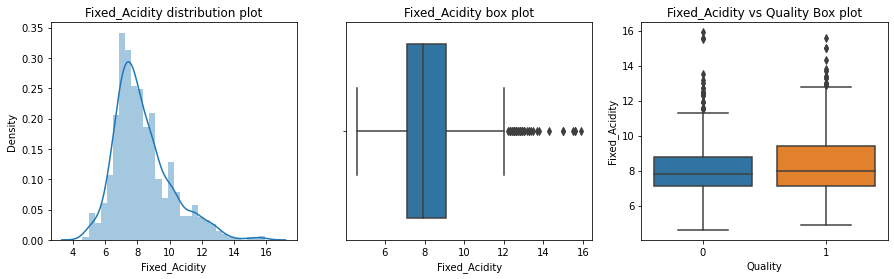

----------------------------------------------------Volatile_Acidity----------------------------------------------------


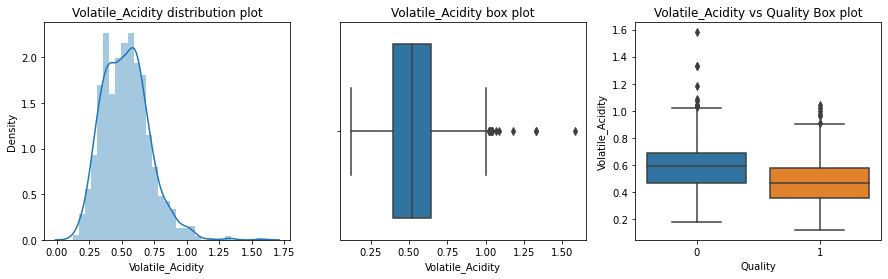

------------------------------------------------------Citric_Acid-------------------------------------------------------


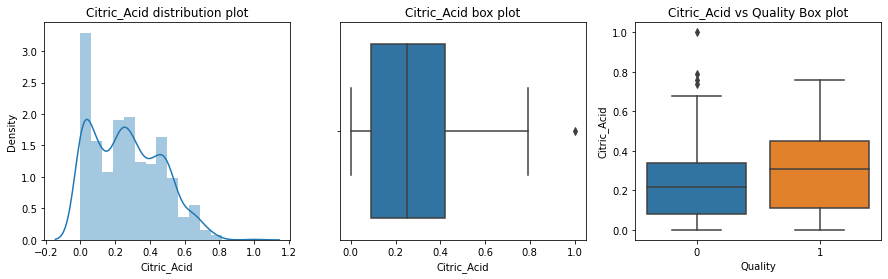

-----------------------------------------------------Residual_Sugar-----------------------------------------------------


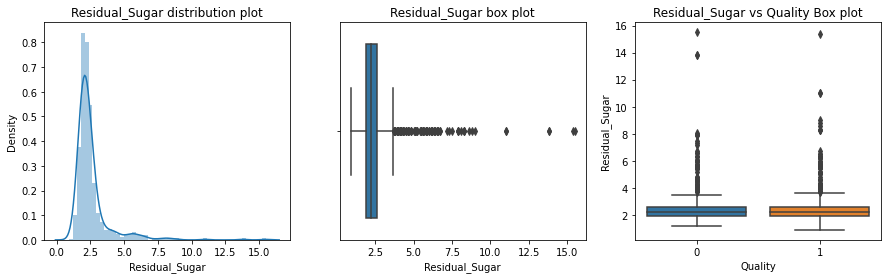

-------------------------------------------------------Chlorides--------------------------------------------------------


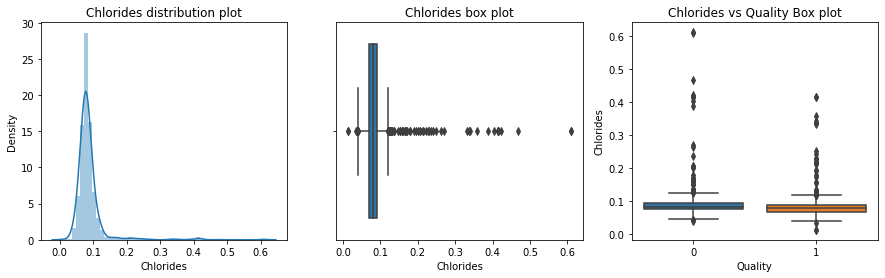

--------------------------------------------------Free_Sulfur_Dioxide---------------------------------------------------


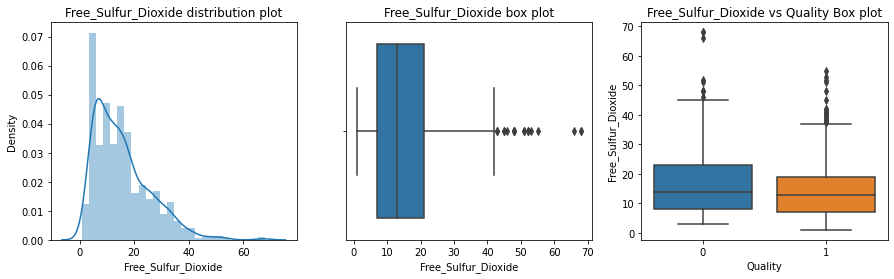

--------------------------------------------------Total_Sulfur_Dioxide--------------------------------------------------


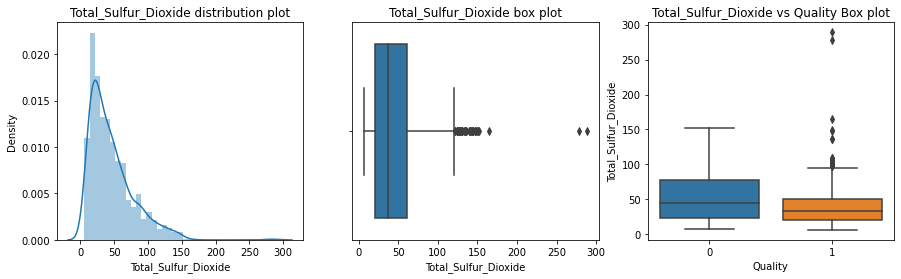

--------------------------------------------------------Density---------------------------------------------------------


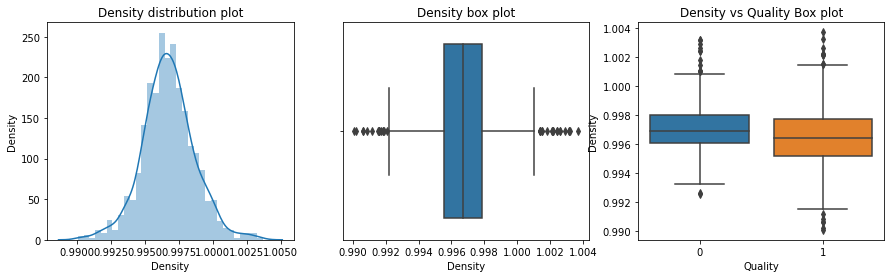

-----------------------------------------------------------Ph-----------------------------------------------------------


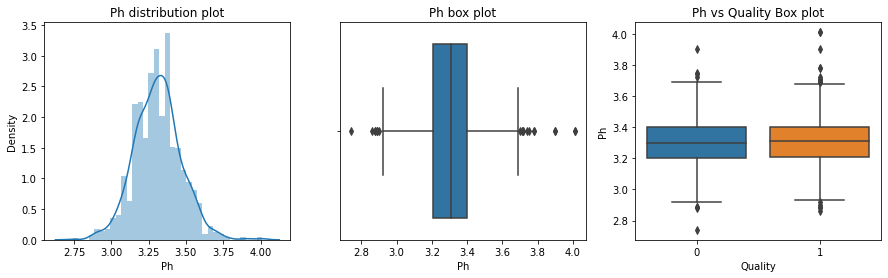

-------------------------------------------------------Sulphates--------------------------------------------------------


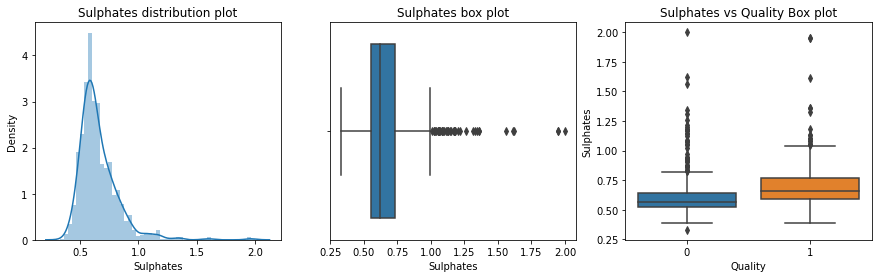

--------------------------------------------------------Alcohol---------------------------------------------------------


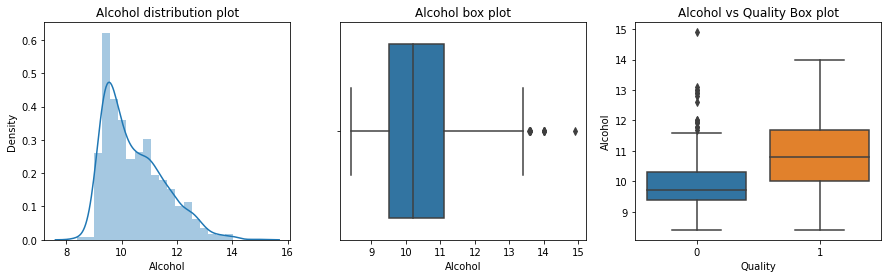

In [17]:
for feature in predictor.columns:
    print(feature.center(120,"-"))
    analysis(predictor[feature], target)

In [18]:
predictor_copy = predictor.copy()

## Square root conversion

Taking square root on the all the predictor columns, as most of them are Right skewed

In [19]:
for i in predictor:
    predictor[i] = np.sqrt(predictor[i])

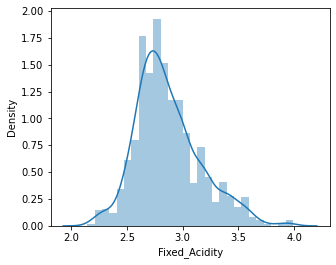

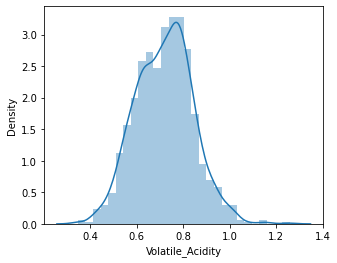

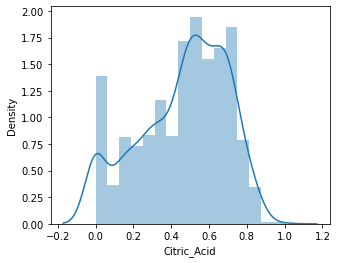

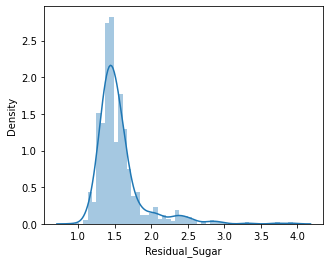

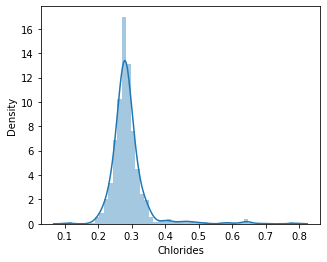

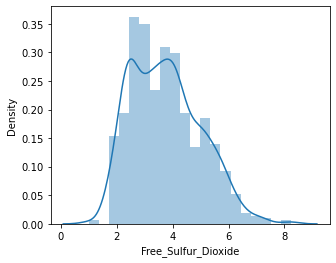

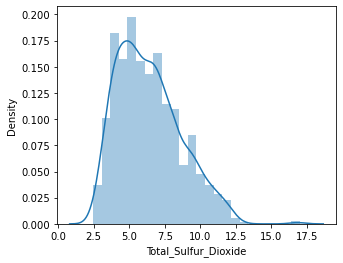

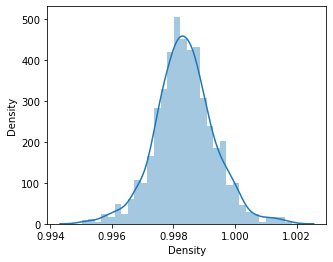

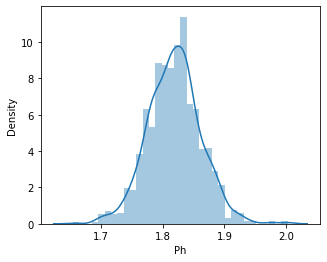

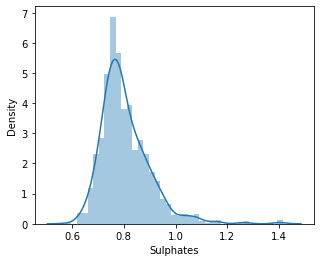

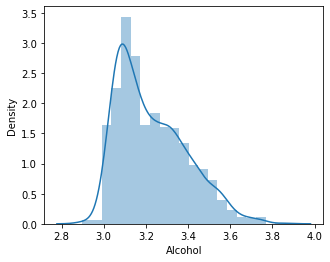

In [20]:
for item in predictor:
    plt.figure(figsize = (5,4))
    sns.distplot(predictor[item])

## Feature Scaling

In [21]:
scaler = StandardScaler()

In [22]:
predictor.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,2.720294,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.998899,1.873499,0.748331,3.065942
1,2.792848,0.938083,0.000000,1.612452,0.313050,5.000000,8.185353,0.998399,1.788854,0.824621,3.130495
2,2.792848,0.871780,0.200000,1.516575,0.303315,3.872983,7.348469,0.998499,1.805547,0.806226,3.130495
3,3.346640,0.529150,0.748331,1.378405,0.273861,4.123106,7.745967,0.998999,1.777639,0.761577,3.130495
4,2.720294,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.998899,1.873499,0.748331,3.065942


In [23]:
scaled_data = pd.DataFrame(scaler.fit_transform(predictor), columns = predictor.columns)

In [24]:
scaled_data.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,-0.504259,0.961579,-1.988613,-0.541052,-0.233823,-0.349422,-0.252373,0.556214,1.265654,-0.594900,-0.981458
1,-0.256537,1.786933,-1.988613,0.168958,0.414594,1.004699,0.799622,0.036648,-0.704126,0.201550,-0.588677
2,-0.256537,1.247374,-1.129260,-0.121895,0.245681,0.098118,0.425685,0.140582,-0.315671,0.009506,-0.588677
3,1.634286,-1.540854,1.226790,-0.541052,-0.265398,0.299318,0.603295,0.660096,-0.965123,-0.456616,-0.588677
4,-0.504259,0.961579,-1.988613,-0.541052,-0.233823,-0.349422,-0.252373,0.556214,1.265654,-0.594900,-0.981458


## Split Train and Test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size = 0.2, random_state = 101)

In [26]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (914, 11)
Shape of x_test: (229, 11)
Shape of y_train: (914,)
Shape of y_test: (229,)


## Logistic Regression Model building

In [27]:
log = LogisticRegression(random_state = 0)

In [28]:
log_model = log.fit(x_train, y_train)
log_predict = log_model.predict(x_test)

In [29]:
print('Training score for Logistic Regression model: {}%'.format(round(log_model.score(x_train,y_train)*100,2)))
print('Accuracy score for Logistic Regression model: {}%'.format(round(accuracy_score(y_test,log_predict)*100,2)))
print('Confusion Matrix: \n',confusion_matrix(y_test,log_predict))
print('Classfication Report: \n',classification_report(y_test, log_predict))

Training score for Logistic Regression model: 75.38%
Accuracy score for Logistic Regression model: 79.48%
Confusion Matrix: 
 [[85 24]
 [23 97]]
Classfication Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       109
           1       0.80      0.81      0.80       120

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



## K-Nearest Neighbors Model building

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn_model = knn.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)

In [32]:
print('Training score for KNN model: {}%'.format(round(knn_model.score(x_train,y_train)*100,2)))
print('Accuracy score for KNN model: {}%'.format(round(accuracy_score(y_test,knn_predict)*100,2)))
print('Confusion Matrix: \n',confusion_matrix(y_test,knn_predict))
print('Classfication Report: \n',classification_report(y_test, knn_predict))

Training score for KNN model: 80.96%
Accuracy score for KNN model: 73.36%
Confusion Matrix: 
 [[71 38]
 [23 97]]
Classfication Report: 
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       109
           1       0.72      0.81      0.76       120

    accuracy                           0.73       229
   macro avg       0.74      0.73      0.73       229
weighted avg       0.74      0.73      0.73       229



## Random Forest Classifier Model building

In [33]:
rfc = RandomForestClassifier(random_state = 0)

In [34]:
rfc_model = rfc.fit(x_train, y_train)
rfc_predict = rfc_model.predict(x_test)

In [35]:
print('Training score for Random Forest Classifier model: {}%'.format(round(rfc_model.score(x_train,y_train)*100,2)))
print('Accuracy score for Random Forest Classifier model: {}%'.format(round(accuracy_score(y_test,rfc_predict)*100,2)))
print('Confusion Matrix: \n',confusion_matrix(y_test,rfc_predict))
print('Classfication Report: \n',classification_report(y_test, rfc_predict))

Training score for Random Forest Classifier model: 100.0%
Accuracy score for Random Forest Classifier model: 82.53%
Confusion Matrix: 
 [[ 89  20]
 [ 20 100]]
Classfication Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.83      0.83      0.83       120

    accuracy                           0.83       229
   macro avg       0.82      0.82      0.82       229
weighted avg       0.83      0.83      0.83       229



## Decision Tree Classifier Model building

In [36]:
dtc = DecisionTreeClassifier(random_state = 0)

In [37]:
dtc_model = dtc.fit(x_train, y_train)
dtc_predict = dtc_model.predict(x_test)

In [38]:
print('Training score for Decision Tree Classifier model: {}%'.format(round(dtc_model.score(x_train,y_train)*100,2)))
print('Accuracy score for Decision Tree Classifier model: {}%'.format(round(accuracy_score(y_test,dtc_predict)*100,2)))
print('Confusion Matrix: \n',confusion_matrix(y_test,dtc_predict))
print('Classfication Report: \n',classification_report(y_test, dtc_predict))

Training score for Decision Tree Classifier model: 100.0%
Accuracy score for Decision Tree Classifier model: 69.0%
Confusion Matrix: 
 [[69 40]
 [31 89]]
Classfication Report: 
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       109
           1       0.69      0.74      0.71       120

    accuracy                           0.69       229
   macro avg       0.69      0.69      0.69       229
weighted avg       0.69      0.69      0.69       229



## Good results with Random Forest Classifiers and Logistic Regression models

Scores are comparatively higher for the 2 models